# Identifying one object (fish) using Amazon SageMaker 

### Table of contents
1. [Introduction to dataset](#introduction)
2. [Labeling with Amazon SageMaker Ground Truth](#groundtruth)
3. [Reviewing labeling results](#review)
4. [Training an Object Detection model](#training)
5. [Review of Training Results](#review_training)
6. [Model Tuning](#model_tuning)
7. [Cleanup](#cleanup)


<a name="introduction"></a>
## Download and upload dataset

First off, download the dataset from whatever where.

Manually upload <-your-dataset-name->.zip into your jupyter nodebook instance.

Then unzip it with the following code.

In [2]:
!unzip ./fish.zip -d ./

Archive:  ./fish.zip
   creating: ./fish/
  inflating: ./fish/fish1.jpg        
  inflating: ./fish/fish1000.jpg     
  inflating: ./fish/fish1001.jpg     
  inflating: ./fish/fish1006.jpg     
  inflating: ./fish/fish1008.jpg     
  inflating: ./fish/fish1009.jpg     
  inflating: ./fish/fish1011.jpg     
  inflating: ./fish/fish1014.jpg     
  inflating: ./fish/fish1016.jpg     
  inflating: ./fish/fish1017.jpg     
  inflating: ./fish/fish102.jpg      
  inflating: ./fish/fish1022.jpg     
  inflating: ./fish/fish1024.jpg     
  inflating: ./fish/fish1025.jpg     
  inflating: ./fish/fish1027.jpg     
  inflating: ./fish/fish1030.jpg     
  inflating: ./fish/fish1032.jpg     
  inflating: ./fish/fish1033.jpg     
  inflating: ./fish/fish1038.jpg     
  inflating: ./fish/fish104.jpg      
  inflating: ./fish/fish1040.jpg     
  inflating: ./fish/fish1041.jpg     
  inflating: ./fish/fish1043.jpg     
  inflating: ./fish/fish1046.jpg     
  inflating: ./fish/fish1048.jpg     
  inflat

  inflating: ./fish/fish198.jpg      
  inflating: ./fish/fish200.jpg      
  inflating: ./fish/fish201.jpg      
  inflating: ./fish/fish206.jpg      
  inflating: ./fish/fish208.jpg      
  inflating: ./fish/fish209.jpg      
  inflating: ./fish/fish211.jpg      
  inflating: ./fish/fish214.jpg      
  inflating: ./fish/fish216.jpg      
  inflating: ./fish/fish217.jpg      
  inflating: ./fish/fish22.jpg       
  inflating: ./fish/fish222.jpg      
  inflating: ./fish/fish224.jpg      
  inflating: ./fish/fish225.jpg      
  inflating: ./fish/fish227.jpg      
  inflating: ./fish/fish230.jpg      
  inflating: ./fish/fish232.jpg      
  inflating: ./fish/fish233.jpg      
  inflating: ./fish/fish238.jpg      
  inflating: ./fish/fish24.jpg       
  inflating: ./fish/fish240.jpg      
  inflating: ./fish/fish241.jpg      
  inflating: ./fish/fish243.jpg      
  inflating: ./fish/fish246.jpg      
  inflating: ./fish/fish248.jpg      
  inflating: ./fish/fish249.jpg      
  inflating:

  inflating: ./fish/fish649.jpg      
  inflating: ./fish/fish65.jpg       
  inflating: ./fish/fish654.jpg      
  inflating: ./fish/fish656.jpg      
  inflating: ./fish/fish657.jpg      
  inflating: ./fish/fish659.jpg      
  inflating: ./fish/fish662.jpg      
  inflating: ./fish/fish664.jpg      
  inflating: ./fish/fish665.jpg      
  inflating: ./fish/fish67.jpg       
  inflating: ./fish/fish670.jpg      
  inflating: ./fish/fish672.jpg      
  inflating: ./fish/fish673.jpg      
  inflating: ./fish/fish675.jpg      
  inflating: ./fish/fish678.jpg      
  inflating: ./fish/fish680.jpg      
  inflating: ./fish/fish681.jpg      
  inflating: ./fish/fish686.jpg      
  inflating: ./fish/fish688.jpg      
  inflating: ./fish/fish689.jpg      
  inflating: ./fish/fish691.jpg      
  inflating: ./fish/fish694.jpg      
  inflating: ./fish/fish696.jpg      
  inflating: ./fish/fish697.jpg      
  inflating: ./fish/fish70.jpg       
  inflating: ./fish/fish702.jpg      
  inflating:

This sample archive contains the following structure:  614`.jpg` training image files

Now let's upload this dataset to your own S3 bucket in preparation for labeling and training using Amazon SageMaker. 

In [3]:
# My S3 bucket created in North Virginia region
# < Enter the name of bucket and prefix >
BUCKET = 'deeplens-sagemaker-experiment'
PREFIX = 'input' # This is the root path to my working space, feel free to use a different path

I uploaded this by manually drag it to s3://deeplens-sagemaker-experiment/fish

## Labeling with SageMaker Ground Truth <a name="groundtruth"></a>

Now, we are ready to run the labeling job using Amazon SageMaker Ground Truth. 

You can follow the tutorial beblow. It's well demonstrated.

Creating a workforce: https://www.youtube.com/watch?v=oEcH8amMcT8

Creating a labeling job: https://www.youtube.com/watch?v=mVA19zjXKGw

Labeling images: https://www.youtube.com/watch?v=z1g6m3AqNYM

Using labeled images: https://www.youtube.com/watch?v=cfq4-NLWTt4&t=174s

Here, we hire public workforce to help us label the bounding boxes for fish.



When it is finished, you can find the `output.manifest` file in  
S3://deeplens-sagemaker-experiment/fish/fish614/manifests/output/output.manifest ,
which is what we want.

## Reviewing labeling results
<a name="reviewing"></a>

After the labeling job was completed, we can see the results of image annotations right in the SageMaker console itself. 
The console displays each image as well as the bounding boxes that were drawn by human labelers.

At the same time we can examine the results in the so-called augmented manifest file that was generated. Let's download and examine the manifest file.

In [4]:
# This block should be useful and prior, but since I mis-named the labeling_job_name and badly named the dir path. 
# For this sample, I ran the following couple of block to rectify it, hopefully.

# <Enter the name of your job here>
labeling_job_name = 'fish614' # feel free to change

import boto3
client = boto3.client('sagemaker')

s3_output = client.describe_labeling_job(LabelingJobName=labeling_job_name)['OutputConfig']['S3OutputPath'] + labeling_job_name
augmented_manifest_url = f'{s3_output}/manifests/output/output.manifest'

import os
import shutil

try:
    os.makedirs('od_output_data/', exist_ok=False)
except FileExistsError:
    shutil.rmtree('od_output_data/')

# now download the augmented manifest file and display first 3 lines
!aws s3 cp $augmented_manifest_url od_output_data/
augmented_manifest_file = 'od_output_data/output.manifest'
!head -3 $augmented_manifest_file


# ---------------------------------------------------------------------------------

download: s3://deeplens-sagemaker-experiment/fish/fish614/manifests/output/output.manifest to od_output_data/output.manifest
{"source-ref":"s3://deeplens-sagemaker-experiment/fish/fish1.jpg","fish614":{"image_size":[{"width":2220,"height":1235,"depth":3}],"annotations":[{"class_id":0,"top":351.4,"left":677.4,"height":81.80000000000007,"width":157.39999999999998},{"class_id":0,"top":146.5999999999999,"left":342,"height":73.00000000000011,"width":130.2},{"class_id":0,"top":792.8,"left":207.6,"height":73.39999999999998,"width":195.20000000000002},{"class_id":0,"top":66.59999999999991,"left":1781.4,"height":86.40000000000009,"width":215},{"class_id":0,"top":1053.8,"left":935.8,"height":75.19999999999999,"width":202.4000000000001}]},"fish614-metadata":{"objects":[{"confidence":0.81},{"confidence":0.81},{"confidence":0.82},{"confidence":0.84},{"confidence":0.84}],"class-map":{"0":"fish"},"type":"groundtruth/object-detection","human-annotated":"yes","creation-date":"2020-10-08T10:38:09.801866

Now let's plot some annotated images. First, let's define a function that displays the local image file and draws over it the bounding boxes obtained via labeling.

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
from itertools import cycle

Matplotlib is building the font cache using fc-list. This may take a moment.


In [6]:
def show_annotated_image(img_path, bboxes):
    im = np.array(Image.open(img_path), dtype=np.uint8)
    #print(im)
    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(im)

    colors = cycle(['r', 'g', 'b', 'y', 'c', 'm', 'k', 'w'])
    
    for bbox in bboxes:
        # Create a Rectangle patch
        rect = patches.Rectangle((bbox['left'],bbox['top']),bbox['width'],bbox['height'],linewidth=1,edgecolor=next(colors),facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()

Next, read the augmented manifest (JSON lines format) line by line and display the first few images.

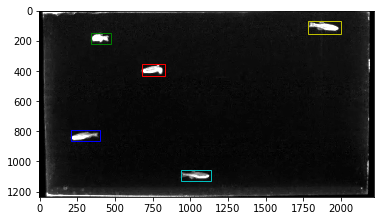

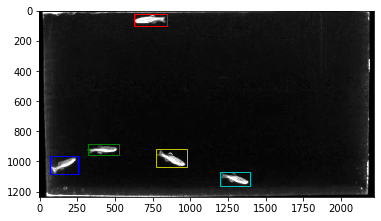

In [7]:
!pip -q install --upgrade pip
!pip -q install jsonlines
import jsonlines
from itertools import islice

with jsonlines.open(augmented_manifest_file, 'r') as reader:
    for desc in islice(reader, 2):
        img_url = desc['source-ref']
        img_file = os.path.basename(img_url)
        # file_exists = os.path.isfile("cars training"+img_file)  # check if the file exists
        bboxes = desc[labeling_job_name]['annotations']
        show_annotated_image("fish/"+img_file, bboxes)     # remember to change the dir path

<a name='training'></a>
## Training an Object Detection Model
We are now ready to use the labeled dataset to train a Machine Learning model using the SageMaker [built-in Object Detection algorithm](https://docs.aws.amazon.com/sagemaker/latest/dg/object-detection.html).

For this, we would need to split the full labeled dataset into a TRAINING and a VALIDATION dataset. Out of the total of 100 images we are going to use 80% for training and 20% for validation. The algorithm will use the first one to train the model and the latter to estimate the accuracy of the trained model. The augmented manifest file from the ground truth output location`output.manifest`. 

In [8]:
import json

with jsonlines.open('od_output_data/output.manifest', 'r') as reader:
    lines = list(reader)
    # Shuffle data in place.
    np.random.shuffle(lines)
    
dataset_size = len(lines)
num_training_samples = round(dataset_size*0.9)

train_data = lines[:num_training_samples]
validation_data = lines[num_training_samples:]

augmented_manifest_filename_train = 'train.manifest'

with open(augmented_manifest_filename_train, 'w') as f:
    for line in train_data:
        f.write(json.dumps(line))
        f.write('\n')

augmented_manifest_filename_validation = 'validation.manifest'

with open(augmented_manifest_filename_validation, 'w') as f:
    for line in validation_data:
        f.write(json.dumps(line))
        f.write('\n')
        
print(f'training samples: {num_training_samples}, validation samples: {len(lines)-num_training_samples}')

training samples: 553, validation samples: 61


Next, let's upload the two manifest files to S3 in preparation for training. We will use the same bucket you created earlier.

In [9]:
pfx_training = PREFIX + '/training' if PREFIX else 'training'

# Defines paths for use in the training job request.
s3_train_data_path = 's3://{}/{}/{}'.format(BUCKET, pfx_training, augmented_manifest_filename_train)
# augmented_manifest_filename_train = 'train.manifest'
s3_validation_data_path = 's3://{}/{}/{}'.format(BUCKET, pfx_training, augmented_manifest_filename_validation)

!aws s3 cp train.manifest s3://$BUCKET/$pfx_training/
!aws s3 cp validation.manifest s3://$BUCKET/$pfx_training/

upload: ./train.manifest to s3://deeplens-sagemaker-experiment/input/training/train.manifest
upload: ./validation.manifest to s3://deeplens-sagemaker-experiment/input/training/validation.manifest


We are now ready to kick off the training. Please try to do it from the SageMaker console, but alternatively, you can just run this code in a new cell using SageMaker Python SDK:
### Code option


In [10]:
import time
import sagemaker

role = sagemaker.get_execution_role()
sess = sagemaker.Session()

training_image = sagemaker.amazon.amazon_estimator.get_image_uri(
    boto3.Session().region_name, 'object-detection', repo_version='latest')

s3_output_path = 's3://{}/{}/output'.format(BUCKET, pfx_training)

# Recall:
# pfx_training = PREFIX + '/training' if PREFIX else 'training'
# PREFIX = 'input' # this is the root path to your working space, feel to use a different path

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


In [11]:
# Create unique job name. If you repeat the training job for whatever reason, remember to rename it with a unique name.
training_job_name = 'fish614'

In [12]:
# To see the details of every image, including: class_id, info of bounding box(all four dimensions) and so on
with jsonlines.open('od_output_data/output.manifest', 'r') as reader:
    lines = list(reader)
    # Shuffle data in place.
    np.random.shuffle(lines)
dataset_size = len(lines)
print(dataset_size)

614


In [13]:
training_params = \
    {
        "AlgorithmSpecification": {
            # NB. This is one of the named constants defined in the first cell.
            "TrainingImage": training_image,
            "TrainingInputMode": "Pipe"
        },
        "RoleArn": role,
        "OutputDataConfig": {
            "S3OutputPath": s3_output_path
        },
        "ResourceConfig": {
            "InstanceCount": 1,
            "InstanceType": "ml.p3.2xlarge",
            "VolumeSizeInGB": 12  # feel free to enlarge the volume size
        },
        "TrainingJobName": training_job_name,
        "HyperParameters": {  
            # NB. These hyperparameters are at the user's discretion and are beyond the scope of this demo.
            "base_network": "resnet-50",
            "use_pretrained_model": "1",
            "num_classes": "1",  # this should be changed if you detect more than 1 object.
            "mini_batch_size": "32", # the mini batch size is very important to modify.
                                     # If you find it wrong when deploy the model to DeepLens, 
                                     # with the problem of mis-match filter size or so,
                                     # remember to change the mini batch size until it works well.
            "epochs": "500", # you can increase this
            "learning_rate": "0.001",
            "lr_scheduler_step": "",
            "lr_scheduler_factor": "0.1",
            "optimizer": "sgd",
            "momentum": "0.9",
            "weight_decay": "0.0005",
            "overlap_threshold": "0.5",
            "nms_threshold": "0.45",
            "image_shape": "300", # Note down this, image size is 300
            "label_width": "350",
            "num_training_samples": str(num_training_samples)
        },
        "StoppingCondition": {
            "MaxRuntimeInSeconds": 86400
        },
        "InputDataConfig": [
            {
                "ChannelName": "train",
                "DataSource": {
                    "S3DataSource": {
                        "S3DataType": "AugmentedManifestFile",  # NB. Augmented Manifest
                        "S3Uri": s3_train_data_path, 
                        "S3DataDistributionType": "FullyReplicated",
                        # NB. This must correspond to the JSON field names in your augmented manifest.
                        "AttributeNames": ['source-ref', 'fish614'] 
                                            #!!!Remember to change 'catsNdogs-only-label-catss' 
                                            #   with your onw labeling job name.
                    }
                },
                "ContentType": "application/x-recordio",
                "RecordWrapperType": "RecordIO",
                "CompressionType": "None"
            },
            {
                "ChannelName": "validation",
                "DataSource": {
                    "S3DataSource": {
                        "S3DataType": "AugmentedManifestFile",  # NB. Augmented Manifest
                        "S3Uri": s3_validation_data_path,
                        "S3DataDistributionType": "FullyReplicated",
                        # NB. This must correspond to the JSON field names in your augmented manifest.
                        "AttributeNames": ['source-ref', 'fish614'] 
                                            #!!!Remember to change 'catsNdogs-only-label-catss' 
                                            #   with your onw labeling job name.
                    }
                },
                "ContentType": "application/x-recordio",
                "RecordWrapperType": "RecordIO",
                "CompressionType": "None"
            }
        ]
    }


In [14]:
# Now we create the SageMaker training job.
client = boto3.client(service_name='sagemaker')
client.create_training_job(**training_params)

{'TrainingJobArn': 'arn:aws:sagemaker:us-east-1:137149936888:training-job/fish614',
 'ResponseMetadata': {'RequestId': '7bd5efd4-63ee-4878-8327-cffccece5acc',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '7bd5efd4-63ee-4878-8327-cffccece5acc',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '82',
   'date': 'Mon, 12 Oct 2020 03:15:50 GMT'},
  'RetryAttempts': 0}}

In [17]:
# Confirm that the training job has started
status = client.describe_training_job(TrainingJobName=training_job_name)['TrainingJobStatus']
print('Training job current status: {}'.format(status))

Training job current status: InProgress


To check the progess of the training job, you can refresh the console or repeatedly evaluate the following cell. When the training job status reads `'Completed'`, move on to the next part of the tutorial.

In [1]:
training_info = client.describe_training_job(TrainingJobName=training_job_name)

print("Training job status: ", training_info['TrainingJobStatus'])
print("Secondary status: ", training_info['SecondaryStatus'])

NameError: name 'client' is not defined

<a name='review_training'></a>

## Review of Training Results

First, let's create the SageMaker model out of model artifacts

In [20]:
import time
timestamp = time.strftime('-%Y-%m-%d-%H-%M-%S', time.gmtime())
model_name = training_job_name + '-model' + timestamp

training_image = training_info['AlgorithmSpecification']['TrainingImage']
model_data = training_info['ModelArtifacts']['S3ModelArtifacts']

primary_container = {
    'Image': training_image,
    'ModelDataUrl': model_data,
}

from sagemaker import get_execution_role

role = get_execution_role()

create_model_response = client.create_model(ModelName = model_name,
                                            ExecutionRoleArn = role,
                                            PrimaryContainer = primary_container)

print(create_model_response['ModelArn'])

arn:aws:sagemaker:us-east-1:137149936888:model/fish614-model-2020-10-12-06-36-06


In [21]:
timestamp = time.strftime('-%Y-%m-%d-%H-%M-%S', time.gmtime())
endpoint_config_name = training_job_name + '-epc' + timestamp
endpoint_config_response = client.create_endpoint_config(
    EndpointConfigName = endpoint_config_name,
    ProductionVariants=[{
        'InstanceType':'ml.t2.medium',  # no need to use those chargable instancetype. ml.t2.medium is good enough
        'InitialInstanceCount':1,
        'ModelName':model_name,
        'VariantName':'AllTraffic'}])

print('Endpoint configuration name: {}'.format(endpoint_config_name))
print('Endpoint configuration arn:  {}'.format(endpoint_config_response['EndpointConfigArn']))

Endpoint configuration name: fish614-epc-2020-10-12-06-36-07
Endpoint configuration arn:  arn:aws:sagemaker:us-east-1:137149936888:endpoint-config/fish614-epc-2020-10-12-06-36-07


### Create Endpoint

The next cell creates an endpoint that can be validated and incorporated into production applications. This takes about 10 minutes to complete.

In [22]:
timestamp = time.strftime('-%Y-%m-%d-%H-%M-%S', time.gmtime())
endpoint_name = training_job_name + '-ep' + timestamp
print('Endpoint name: {}'.format(endpoint_name))

endpoint_params = {
    'EndpointName': endpoint_name,
    'EndpointConfigName': endpoint_config_name,
}
endpoint_response = client.create_endpoint(**endpoint_params)
print('EndpointArn = {}'.format(endpoint_response['EndpointArn']))

Endpoint name: fish614-ep-2020-10-12-06-36-12
EndpointArn = arn:aws:sagemaker:us-east-1:137149936888:endpoint/fish614-ep-2020-10-12-06-36-12


Copy the endpoint name to the below Paramater

In [23]:
endpoint_name= "fish614-ep-2020-10-12-06-36-12"
# Remember to copy the Endpoint name that's shown in the above output

You can repeadly check the endpoint status.
Or just go to AWS SageMaker control panel.

In [24]:
# get the status of the endpoint
response = client.describe_endpoint(EndpointName=endpoint_name)
status = response['EndpointStatus']
print('EndpointStatus = {}'.format(status))

EndpointStatus = Creating


### Perform inference

We will invoke the deployed endpoint to detect some fish in a few test images that were inside the `test` folder.

In [25]:
# wait until the status has changed
client.get_waiter('endpoint_in_service').wait(EndpointName=endpoint_name)
endpoint_response = client.describe_endpoint(EndpointName=endpoint_name)
status = endpoint_response['EndpointStatus']
if status != 'InService':
    raise Exception('Endpoint creation failed.')

In [26]:
import glob
test_images = glob.glob('test/*')
print(*test_images, sep="\n")
print(test_images)

test/fish6.jpg
test/fish3.jpg
test/fish1.jpg
['test/fish6.jpg', 'test/fish3.jpg', 'test/fish1.jpg']


Next, define a function that converts the prediction array returned by our endpoint to the bounding box structure expected by our image display function.

In [27]:
def prediction_to_bbox_data(image_path, prediction):
    class_id, confidence, xmin, ymin, xmax, ymax = prediction
    width, height = Image.open(image_path).size
    bbox_data = {'class_id': class_id,
               'height': (ymax-ymin)*height,
               'width': (xmax-xmin)*width,
               'left': xmin*width,
               'top': ymin*height}
    return bbox_data

Finally, for each of the test images, the following cell transforms the image into the appropriate format for realtime prediction.

In [28]:
import matplotlib.pyplot as plt

runtime_client = boto3.client('sagemaker-runtime')

# Call SageMaker endpoint to obtain predictions
def get_predictions_for_img(runtime_client, endpoint_name, img_path):
    with open(img_path, 'rb') as f:
        payload = f.read()
        payload = bytearray(payload)
    
    response = runtime_client.invoke_endpoint(EndpointName=endpoint_name, 
                                              ContentType='application/x-image', 
                                              Body=payload)
    
    result = response['Body'].read()
    
    result = json.loads(result)

    return result

In [49]:
for test_image in test_images:
    result = get_predictions_for_img(runtime_client, endpoint_name, test_image)
    confidence_threshold = .6    # feel free to change threshold and best_n
    best_n = 5
    # display the best n predictions with confidence > confidence_threshold
    # print(result)
    predictions = [prediction for prediction in result['prediction'] if prediction[1] > confidence_threshold]
    print('\n',predictions)
    predictions.sort(reverse=True, key = lambda x: x[1])
    bboxes = [prediction_to_bbox_data(test_image, prediction) for prediction in predictions[:best_n]]
    # print(bboxes)
    show_annotated_image(test_image, bboxes)

ValidationError: An error occurred (ValidationError) when calling the InvokeEndpoint operation: Endpoint fish614-ep-2020-10-12-06-36-12 of account 137149936888 not found.

<a name='model_tuning'></a>
## Model Tuning

When you configured the training job you needed to add many hyperparameters that affect the performance of the algorithm and the quality of the resulting model. But how do you pick the right hyperparameters?

If you have experience with the specific algorithm and understand the innerworkings of it, you may already have a good sense of appropriate values. But even then, it's impossible to know the exact best value of each hyperparameter. Often you can zero in on the best values by trying many different combination of values, effectively searching in the hyperparameter space. SageMaker makes this extremely easy with the Model Tuning feature, also known as Hyperparameter Optimization (or HPO). With Model Tuning you simply decide which of the hyperparameters you are not sure about and specify the range of values for each that SageMaker needs to explore. Let's see again how this can be accomplished via the console.


<a name='cleanup'></a>
## Cleanup

At the end of the lab we would like to delete the real-time endpoint, as keeping a real-time endpoint around while being idle is costly and wasteful. 

In [48]:
client.delete_endpoint(EndpointName=endpoint_name)

{'ResponseMetadata': {'RequestId': '548b6651-c5f7-4421-b94e-e10ec0d8abc4',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '548b6651-c5f7-4421-b94e-e10ec0d8abc4',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '0',
   'date': 'Mon, 12 Oct 2020 06:51:04 GMT'},
  'RetryAttempts': 0}}

# Convert the model to a deeplens deployable model
Go to the train model and find out the Model data location

When deploying an Amazon SageMaker-trained SSD model, you must first run deploy.py (available from https://github.com/chenjunweii/mxnet-ssd) to convert the model artifact into a deployable mode. After cloning or downloading the MXNet repository, run the git reset command before calling deploy.py to convert the model, if the latest version does not work.


In [35]:
# Remember to change the prefix!
BUCKET_AND_PREFIX = "s3://deeplens-sagemaker-experiment/input/training/output/fish614/output"
NUM_CLASSES = 1 ### We have 1 class here
TARGET_PREFIX = "s3://deeplens-sagemaker-experiment/deploy-output"

In [36]:
!rm -rf ./tmp && mkdir ./tmp
!aws s3 cp $BUCKET_AND_PREFIX/model.tar.gz ./tmp       #Download the model here for conversion
!gunzip -c tmp/model.tar.gz | tar -C tmp -xopf -
!ls -l tmp/*

download: s3://deeplens-sagemaker-experiment/input/training/output/fish614/output/model.tar.gz to tmp/model.tar.gz
-rw-r--r-- 1 ec2-user ec2-user       673 Oct 12 06:10 tmp/hyperparams.json
-rw-r--r-- 1 ec2-user ec2-user 109336812 Oct 12 06:10 tmp/model_algo_1-0000.params
-rw-r--r-- 1 ec2-user ec2-user    132701 Oct 12 06:10 tmp/model_algo_1-symbol.json
-rw-rw-r-- 1 ec2-user ec2-user 101468168 Oct 12 06:11 tmp/model.tar.gz


In [37]:
!mv tmp/*-0000.params ./tmp/ssd_resnet50_300-0000.params
!mv tmp/*-symbol.json ./tmp/ssd_resnet50_300-symbol.json

In [38]:
!ls -l tmp/*

-rw-r--r-- 1 ec2-user ec2-user       673 Oct 12 06:10 tmp/hyperparams.json
-rw-rw-r-- 1 ec2-user ec2-user 101468168 Oct 12 06:11 tmp/model.tar.gz
-rw-r--r-- 1 ec2-user ec2-user 109336812 Oct 12 06:10 tmp/ssd_resnet50_300-0000.params
-rw-r--r-- 1 ec2-user ec2-user    132701 Oct 12 06:10 tmp/ssd_resnet50_300-symbol.json


In [39]:
rm -rf ./mxnet-ssd* && git clone

fatal: You must specify a repository to clone.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    -j, --jobs <n>        number of submodules cloned in parallel
    --template <template-directory>
                          directory from which templates will be used
    --reference <repo>    reference repository
    --reference-if-able <repo>
                          reference repository
    --dissociate          u

In [40]:
!git clone https://github.com/chenjunweii/mxnet-ssd

Cloning into 'mxnet-ssd'...
remote: Enumerating objects: 106, done.
remote: Total 106 (delta 0), reused 0 (delta 0), pack-reused 106
Receiving objects: 100% (106/106), 4.31 MiB | 14.53 MiB/s, done.
Resolving deltas: 100% (29/29), done.


# open a new terminal in this node instance

In [41]:
!pip install MXNet ##make sure MXNet install in the environment

     |████████████████████████████████| 55.0 MB 59 kB/s  eta 0:00:01


In [42]:
!python ./mxnet-ssd/deploy.py --network resnet50 \
  --data-shape 300 --num-class 1 --prefix tmp/ssd_ ##Image-shape is 300, the number of class is 1

out :  <Symbol detection>
[06:49:26] src/nnvm/legacy_json_util.cc:209: Loading symbol saved by previous version v1.4.1. Attempting to upgrade...
[06:49:26] src/nnvm/legacy_json_util.cc:217: Symbol successfully upgraded!
Saved model: tmp/deploy_ssd_resnet50_300-0000.params
Saved symbol: tmp/deploy_ssd_resnet50_300-symbol.json


## If you see message "python: can't open file './incubator-mxnet/example/ssd/deploy.py': [Errno 2] No such file or directory".You will need to run git reset.

In [43]:
!rm tmp/ssd_*  &&  rm tmp/model.tar.gz && ls tmp

deploy_ssd_resnet50_300-0000.params  hyperparams.json
deploy_ssd_resnet50_300-symbol.json


In [44]:
!tar -cvzf ./patched_model.tar.gz -C tmp \
  ./deploy_ssd_resnet50_300-0000.params \
  ./deploy_ssd_resnet50_300-symbol.json \
  ./hyperparams.json

./deploy_ssd_resnet50_300-0000.params
./deploy_ssd_resnet50_300-symbol.json
./hyperparams.json


In [45]:
!aws s3 cp patched_model.tar.gz $TARGET_PREFIX/

upload: ./patched_model.tar.gz to s3://deeplens-sagemaker-experiment/deploy-output/patched_model.tar.gz


In [46]:
!rm -rf tmp
!rm *.gz

# Optimize the model from your AWS Lambda function on AWS DeepLens
An AWS DeepLens project consists of a trained model and an AWS Lambda function. Using AWS IoT Greengrass on the AWS DeepLens, the inference Lambda function performs three important functions:

It captures the image from a video stream.
It performs an inference using that image against the deployed machine learning model.
It provides the results to both AWS IoT and the output video stream.
AWS IoT Greengrass lets you execute AWS Lambda functions locally, reducing the complexity of developing embedded software. For details on creating and publishing your inference Lambda function, see this documentation.

When using a custom object detection model produced by Amazon SageMaker, there is an additional step in your AWS DeepLens inference Lambda function. The inference function needs to call MXNet’s model optimizer before performing any inference using your model. Here is the Python code for optimizing and loading the model:

This should be in Lambda Function

##ret, model_path = mo.optimize('deploy_ssd_resnet50_300',input_width, input_height)
##model = awscam.Model(model_path, {'GPU': 1})

 output map need to adjust to below classes.
        
        output_map = {0:'fish'}
        
The "deploy_ssd_resnet50_300" is the one we converted to. The image sharpe is 300, the frame height and width also need to be 300.

        # The height and width of the training set images
        input_height = 300
        input_width = 300
        
        # optimize the model
        client.publish(topic=iot_topic, payload='Optimizing model...')
        ret, model_path = mo.optimize('deploy_ssd_resnet50_300', input_width, input_height)
        #model_path = '/opt/awscam/artifacts/mxnet_deploy_ssd_resnet50_300_FP16_FUSED.xml'
        
        # Load the model onto the GPU.
        client.publish(topic=iot_topic, payload='Loading object detection model')
        model = awscam.Model(model_path, {'GPU': 1})
        client.publish(topic=iot_topic, payload='Object detection model loaded')
        
        # Set the threshold for detection
        detection_threshold = 0.60
        

        

# After fixed the lambda function, import the model from s3 to deeplens, use the Lambda function and update the version. Deploy to node.

It is expected to see IOT console mqtt messsage "Optimizing model..." 'Loading object detection model''Object detection model loaded'.

In addition, you can change the detection_threshold for better outcome.